In [4]:
#1.Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#2.Load the dataset (download it from Kaggle and place it in your working directory):
data = pd.read_csv('cardekho.csv') 

In [11]:
#3.Inspect the dataset:
print(data.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
None


In [13]:
print(data.describe())

              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04           19.418783   
std       4.044249   8.062534e+05  5.655055e+04            4.037145   
min    1983.000000   2.999900e+04  1.000000e+00            0.000000   
25%    2011.000000   2.549990e+05  3.500000e+04           16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04           19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04           22.320000   
max    2020.000000   1.000000e+07  2.360457e+06           42.000000   

            engine        seats  
count  7907.000000  7907.000000  
mean   1458.625016     5.416719  
std     503.916303     0.959588  
min     624.000000     2.000000  
25%    1197.000000     5.000000  
50%    1248.000000     5.000000  
75%    1582.000000     5.000000  
max    3604.000000    14.000000  


In [14]:
#4.Check for missing values:
print(data.isnull().sum())


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [17]:
# Handle missing values
data = data.dropna()  # or use imputation techniques like filling with mean/median/mode


In [19]:
print(data.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


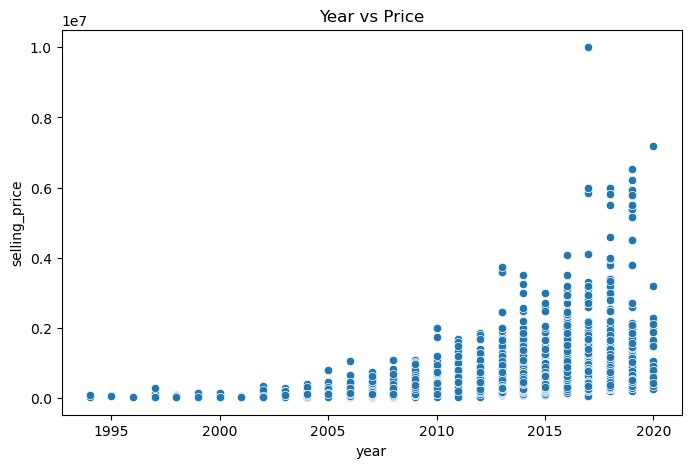

In [20]:
#5.Scatter plots for relationships:
# a) Year vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='year', y='selling_price', data=data)
plt.title('Year vs Price')
plt.show()


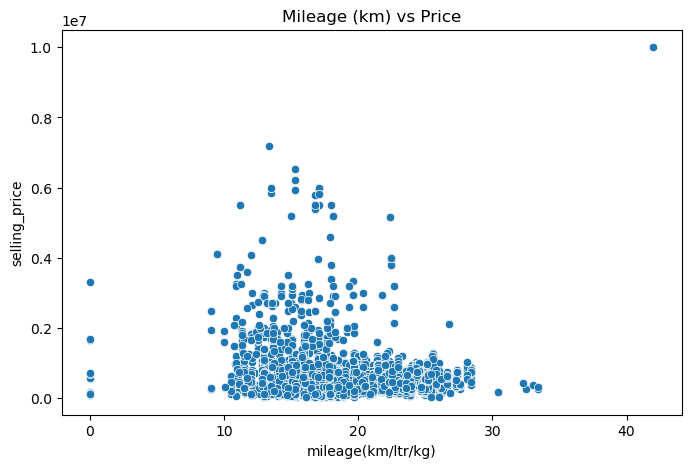

In [21]:
# b) Mileage (km) vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage(km/ltr/kg)', y='selling_price', data=data)
plt.title('Mileage (km) vs Price')
plt.show()


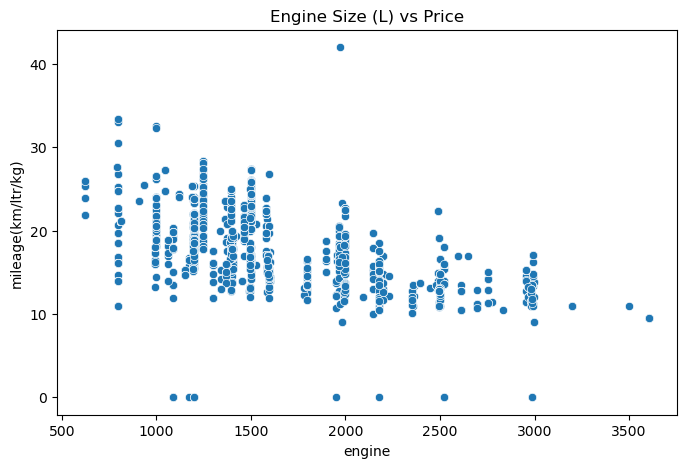

In [22]:
# c) Engine Size (L) vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='engine', y='mileage(km/ltr/kg)', data=data)
plt.title('Engine Size (L) vs Price')
plt.show()


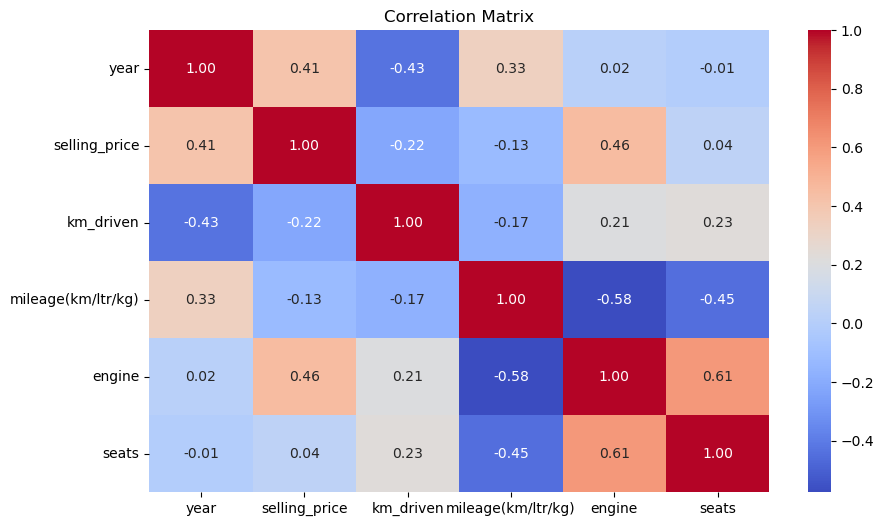

In [27]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])


if numeric_data.shape[1] < 2:
    print("Not enough numeric columns for correlation analysis.")
else:
    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

   
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()



In [33]:
print(data.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


In [36]:
#Split Data, Train Model, and Predict Prices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['year', 'mileage(km/ltr/kg)']]  
y = data['selling_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
#Train the model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
#Predict prices:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [39]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# For training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# For testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train}, R2: {r2_train}')
print(f'Testing MSE: {mse_test}, R2: {r2_test}')


Training MSE: 484144343844.4079, R2: 0.24389222338880445
Testing MSE: 556246705183.4661, R2: 0.2559161164403999


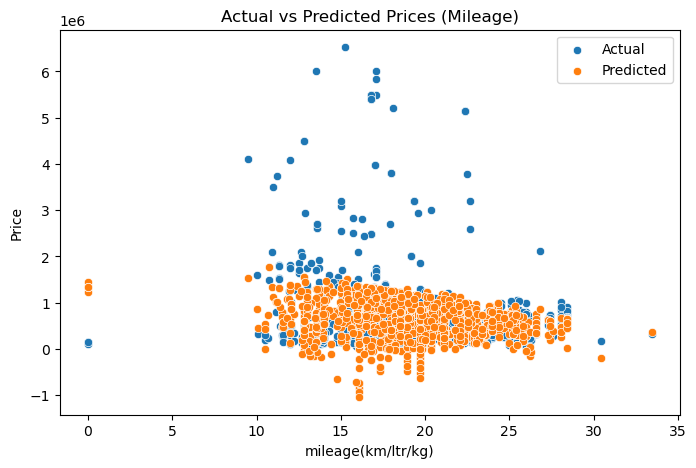

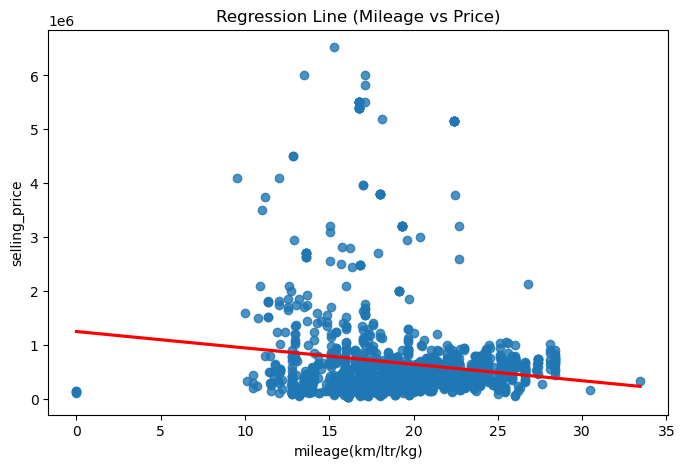

In [41]:
#Visualize the Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['mileage(km/ltr/kg)'], y=y_test, label='Actual')
sns.scatterplot(x=X_test['mileage(km/ltr/kg)'], y=y_test_pred, label='Predicted')
plt.title('Actual vs Predicted Prices (Mileage)')
plt.xlabel('mileage(km/ltr/kg)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test['mileage(km/ltr/kg)'], y=y_test, line_kws={"color": "red"}, ci=None)
plt.title('Regression Line (Mileage vs Price)')
plt.show()
